In [53]:
import pandas as pd
import numpy as np
cars = pd.read_csv('imports-85.data',names = ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'])
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [54]:
cars.replace("?",np.nan,inplace = True)
num_cols = ['symboling','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg']
num_cars = cars[num_cols].copy()
num_cars = num_cars.dropna(axis = 0)
# print(num_cars.head())
num_cars = num_cars.astype(float)
num_cars = ((num_cars - num_cars.mean())/num_cars.std())
num_cars['price'] = cars['price'].copy()
num_cars = num_cars.astype(float)
num_cars = num_cars.dropna(axis = 0)

In [55]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

In [56]:
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
k = [1,3,5,7,9]
def knn_train_test(train_cols, test_col, df):
    train_df = df.iloc[:round(df.shape[0]/2)]
    test_df = df.iloc[round(df.shape[0]/2):]
#     rmse_values = list()
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_cols], train_df[test_col])
    predictions = knn.predict(test_df[train_cols])
    rmse = mean_squared_error(predictions,test_df[test_col] )**(1/2)
#         rmse_values.append(rmse)
    return rmse
#     plt.scatter(k,rmse_values)
#     plt.show()
cols_dict = dict()
for col in num_cars.columns:
    cols_dict[col] = knn_train_test([col],'price',num_cars)   


In [57]:
cols_dict

{'bore': 13655.072081574293,
 'city_mpg': 3938.538319638103,
 'compression_ratio': 8394.35581600954,
 'curb_weight': 5005.980979036399,
 'engine_size': 3923.109488947261,
 'height': 11039.363676622954,
 'horsepower': 4394.8231322914135,
 'length': 8139.218448232068,
 'peak_rpm': 9630.306795768169,
 'price': 302.71553861602104,
 'stroke': 10157.516392744143,
 'symboling': 9088.52566903461,
 'wheel_base': 9563.380468126548,
 'width': 6444.8723421010745}

In [69]:
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
k = [1,3,5,7]
def knn_train_test(train_cols, test_col, df, k):
    train_df = df.iloc[:round(df.shape[0]/2)]
    test_df = df.iloc[round(df.shape[0]/2):]
    rmse_values = list()
    rmse_dict = dict()
    for value in k:
        knn = KNeighborsRegressor(n_neighbors = value)
        knn.fit(train_df[train_cols], train_df[test_col])
        predictions = knn.predict(test_df[train_cols])
        rmse = mean_squared_error(predictions,test_df[test_col] )**(1/2)
        rmse_values.append(rmse)
        rmse_dict[value] = np.mean(rmse_values)
    return rmse_dict
cols_dict = dict()
for col in num_cars.columns:
    cols_dict[col] = knn_train_test([col],'price',num_cars,k)
    print(cols_dict[col])

{1: 8135.908773272369, 3: 7521.1757079099725, 5: 8043.625694951518, 7: 8652.974136680274}
{1: 8089.287142525403, 3: 8655.587425207012, 5: 8958.185106180192, 7: 8915.484576524874}
{1: 10743.387365853636, 3: 9261.685622850211, 5: 8887.529897977496, 7: 8734.967927370002}
{1: 6002.0607534962355, 3: 5936.913241995573, 5: 6106.232942030741, 7: 6147.799140300257}
{1: 15359.508227469092, 3: 13540.288555173298, 5: 12706.64692898985, 7: 12065.65967593584}
{1: 6511.085459097439, 3: 5977.156048544068, 5: 5653.4310253748445, 7: 5475.196598646177}
{1: 4719.891868191758, 3: 4554.751071083461, 5: 4344.203877038061, 7: 4291.879447524871}
{1: 12671.454263198439, 3: 13328.860857977239, 5: 13437.59793250959, 7: 12886.867178489048}
{1: 11636.744507462505, 3: 11962.375491833041, 5: 11360.75579213674, 7: 10433.603523380114}
{1: 9086.79845006837, 3: 8823.886972671677, 5: 8680.709920450965, 7: 8525.591889271982}
{1: 5294.768551155875, 3: 5400.713279624608, 5: 5065.416563846877, 7: 4726.935491268114}
{1: 11122.

In [70]:
print(cols_dict['bore'])

{1: 12671.454263198439, 3: 13328.860857977239, 5: 13437.59793250959, 7: 12886.867178489048}


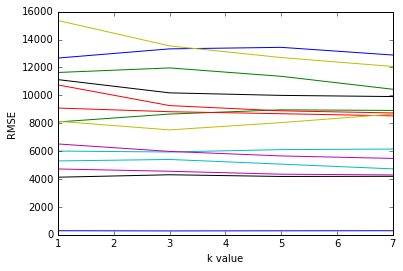

In [71]:
%matplotlib inline
for k,v in cols_dict.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [72]:
def knn_train_test(train_cols, test_col, df):
    train_df = df.iloc[:round(df.shape[0]/2)]
    test_df = df.iloc[round(df.shape[0]/2):]
#     rmse_values = list()
    knn = KNeighborsRegressor()
    knn.fit(train_df[train_cols], train_df[test_col])
    predictions = knn.predict(test_df[train_cols])
    rmse = mean_squared_error(predictions,test_df[test_col] )**(1/2)
#         rmse_values.append(rmse)
    return rmse
knn_train_test(['engine_size','city_mpg'],'price',num_cars)

3644.373586324683

In [73]:
knn_train_test(['engine_size','city_mpg','horsepower'],'price',num_cars)

3953.6831753611746

In [74]:
knn_train_test(['engine_size','city_mpg','horsepower','curb_weight'],'price',num_cars)

4143.336375583946

In [75]:
knn_train_test(['engine_size','city_mpg','horsepower','curb_weight',],'price',num_cars)

4143.336375583946

In [78]:
def knn_train_test(train_cols, test_col, df, k):
    train_df = df.iloc[:round(df.shape[0]/2)]
    test_df = df.iloc[round(df.shape[0]/2):]
    rmse_values = list()
    rmse_dict = dict()
    for value in k:
        knn = KNeighborsRegressor(n_neighbors = value)
        knn.fit(train_df[train_cols], train_df[test_col])
        predictions = knn.predict(test_df[train_cols])
        rmse = mean_squared_error(predictions,test_df[test_col] )**(1/2)
        rmse_values.append(rmse)
        rmse_dict[value] = np.mean(rmse_values)
    return rmse_dict
k_values = knn_train_test(['engine_size','city_mpg'],'price',num_cars,[x for x in range(1,25)])

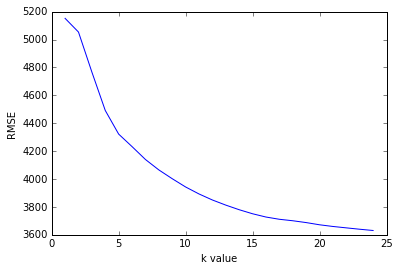

In [85]:
%matplotlib inline
plt.plot(list(k_values.keys()),list(k_values.values()))
plt.xlabel('k value')
plt.ylabel('RMSE')